In [ ]:
import numpy as np

# Define the environment
class Gridworld:
    def __init__(self):
        self.grid_size = (4, 4)
        self.num_actions = 4  # 4 actions: up, down, left, right
        self.goal_state = (3, 3)

    def reset(self):
        self.current_state = (0, 0)
        return self.current_state

    def step(self, action):
        # Define action effects
        if action == 0:  # Up
            next_state = (max(0, self.current_state[0] - 1), self.current_state[1])
        elif action == 1:  # Down
            next_state = (min(self.grid_size[0] - 1, self.current_state[0] + 1), self.current_state[1])
        elif action == 2:  # Left
            next_state = (self.current_state[0], max(0, self.current_state[1] - 1))
        else:  # Right
            next_state = (self.current_state[0], min(self.grid_size[1] - 1, self.current_state[1] + 1))

        # Determine reward and terminal state
        if next_state == self.goal_state:
            reward = 1
            done = True
        else:
            reward = 0
            done = False

        self.current_state = next_state
        return next_state, reward, done

# Monte Carlo Control
def monte_carlo_control(env, num_episodes=1000, gamma=0.9, epsilon=0.1):
    # Initialize Q table and state-action visit count
    Q = np.zeros((env.grid_size[0], env.grid_size[1], env.num_actions))
    N = np.zeros_like(Q)

    for _ in range(num_episodes):
        episode = []
        state = env.reset()

        # Generate an episode
        while True:
            if np.random.rand() < epsilon:
                action = np.random.randint(env.num_actions)  # epsilon-greedy exploration
            else:
                action = np.argmax(Q[state[0], state[1]])

            next_state, reward, done = env.step(action)
            episode.append((state, action, reward))
            state = next_state
            if done:
                break

        G = 0
        # Update Q values using the episode
        for t in reversed(range(len(episode))):
            state, action, reward = episode[t]
            G = gamma * G + reward
            N[state[0], state[1], action] += 1
            alpha = 1 / N[state[0], state[1], action]  # constant step-size
            Q[state[0], state[1], action] += alpha * (G - Q[state[0], state[1], action])

    return Q

# Main function
if __name__ == "__main__":
    env = Gridworld()
    Q_values = monte_carlo_control(env)
    print("Q-values:")
    print(Q_values)


Q-values:
[[[6.68601786e-004 7.25999930e-003 2.26065930e-002 3.38318944e-001]
  [8.53018825e-004 2.50194392e-002 2.47648362e-002 3.86769423e-001]
  [6.79778544e-004 2.35315973e-002 1.61285481e-002 4.31345361e-001]
  [1.38181436e-003 5.00113031e-001 2.68792383e-002 2.42035673e-002]]

 [[9.31998183e-003 2.19591421e-001 2.11777763e-001 1.74841496e-001]
  [7.77155070e-003 4.65240269e-002 5.22097961e-002 2.81917349e-001]
  [1.31833521e-002 2.65720500e-002 1.85712473e-001 6.89907409e-001]
  [2.73057491e-002 8.74443191e-001 4.20776666e-001 5.06842652e-001]]

 [[5.81864238e-004 0.00000000e+000 0.00000000e+000 4.77875121e-001]
  [3.15828490e-001 2.65720500e-001 1.34824042e-001 6.34230000e-001]
  [3.59694379e-001 2.54186583e-001 0.00000000e+000 2.47032823e-323]
  [5.89377892e-001 1.00000000e+000 5.09091184e-001 8.90975676e-001]]

 [[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
  [2.95245000e-001 0.00000000e+000 0.00000000e+000 0.00000000e+000]
  [2.82429536e-001 0.00000000e+0

Q-values:
[[[7.71444981e-05 1.64633509e-03 3.20539831e-03 1.04013263e-01]
  [9.59640403e-05 1.68125448e-03 2.49588168e-03 1.15308658e-01]
  [1.19352874e-04 1.31754235e-01 3.38825781e-03 3.88371038e-03]
  [9.72396066e-06 6.32051715e-06 8.11265205e-03 1.65489753e-04]]

 [[2.79603597e-03 3.62720343e-02 1.04543519e-01 3.07269776e-02]
  [2.25221209e-04 1.10295078e-01 3.37365995e-03 6.75000000e-03]
  [4.73420544e-03 1.33450489e-01 5.11035574e-02 7.00595311e-01]
  [3.34438871e-03 7.97852787e-01 1.47034393e-01 1.61042781e-01]]

 [[3.00682472e-02 4.42404791e-02 5.53519597e-02 1.92028952e-01]
  [1.82742013e-02 4.65357608e-01 1.04623619e-01 3.08700000e-01]
  [3.40417789e-01 2.67196725e-01 2.95431271e-02 8.35714286e-01]
  [1.57696007e-01 1.00000000e+00 6.35369493e-01 6.87804038e-01]]

 [[2.82793190e-02 3.17921983e-02 1.20288782e-01 3.01423171e-01]
  [8.12854410e-02 3.55840133e-01 3.42094016e-01 5.68271038e-01]
  [6.09302679e-01 0.00000000e+00 5.31441000e-01 0.00000000e+00]
  [0.00000000e+00 0.0000

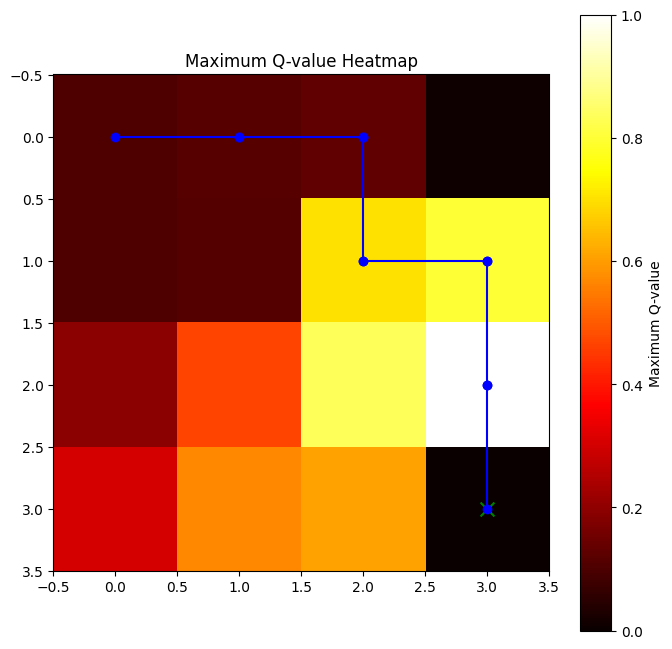

In [ ]:
import matplotlib.pyplot as plt

# Main function
if __name__ == "__main__":
    env = Gridworld()
    Q_values = monte_carlo_control(env)
    print("Q-values:")
    print(Q_values)

    # Find the best path
    state = env.reset()
    path = [state]
    while True:
        action = np.argmax(Q_values[state[0], state[1]])
        next_state, _, done = env.step(action)
        path.append(next_state)
        state = next_state
        if done:
            break

    # Visualize the gridworld and path
    plt.figure(figsize=(8, 8))
    plt.imshow(Q_values.max(axis=2), cmap='hot', interpolation='nearest')
    plt.colorbar(label='Maximum Q-value')
    plt.title('Maximum Q-value Heatmap')
    for i in range(len(path) - 1):
        plt.plot([path[i][1], path[i + 1][1]], [path[i][0], path[i + 1][0]], color='blue', marker='o')
    plt.scatter(env.goal_state[1], env.goal_state[0], color='green', marker='x', s=100, label='Goal State')

